In [2]:
 !pip install -q keras

In [34]:
import keras

In [1]:
import os 
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [4]:

dir = 'C:\\Users\\Nasik\\Desktop\\Semester 6\\FYP\\dataset-resized'

In [5]:
categories = ['cardboard','glass','metal','paper','plastic','trash']

In [6]:
data = [ ]

In [7]:
for category in categories:
    path = os.path.join(dir,category)
    label=categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        trash_img = cv2.imread(imgpath,0)
        try:
            trash_img = cv2.resize(trash_img,(50,50))
            image=np.array(trash_img).flatten()
            data.append([image,label])
        except Exception as e:
            pass
print(len(data))    


2527


In [8]:
pick_in= open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()


In [10]:
pick_in= open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()


In [11]:

random.shuffle(data)
features = []
labels=[]


In [12]:
for feature, label in data:
    features.append(feature)
    labels.append(label)


In [27]:
xtrain, xtest, ytrain,ytest = train_test_split (features, labels, train_size=0.80, test_size=0.20)


In [23]:
model= SVC(C=1,kernel='poly', gamma='auto')
model.fit(xtrain, ytrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
pick= open('model1.sav','wb')
pickle.dump(model,pick)
pick.close()


In [29]:
pick= open('model1.sav','rb')
model=pickle.load(pick)
pick.close()


Accuracy :  0.8814229249011858
Prediction is : glass


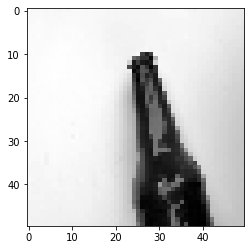

In [32]:
random.shuffle(data)
prediction= model.predict(xtest)
accuracy = model.score (xtest, ytest)

categories = ['cardboard','glass','metal','paper','plastic','trash']

print('Accuracy : ', accuracy)
print('Prediction is :',categories[prediction[0]])



trash=xtest[0].reshape(50,50)
plt.imshow(trash, cmap='gray')
plt.show()

  


In [33]:
from sklearn.metrics import classification_report, confusion_matrix 

In [34]:

# print prediction results 
predictions = model.predict(xtest) 
print(classification_report(ytest, predictions)) 
print(confusion_matrix(ytest, predictions)) 

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.85      0.87      0.86       113
           2       0.91      0.88      0.90        84
           3       0.95      0.88      0.92       118
           4       0.85      0.92      0.89        88
           5       0.88      0.81      0.84        26

    accuracy                           0.88       506
   macro avg       0.88      0.87      0.88       506
weighted avg       0.88      0.88      0.88       506

[[ 68   5   0   0   2   2]
 [  3  98   4   2   5   1]
 [  5   3  74   1   1   0]
 [  5   2   1 104   6   0]
 [  1   4   1   1  81   0]
 [  0   3   1   1   0  21]]


In [97]:
#CONFUSION MATRIX
from sklearn.svm import SVC
predictions = model.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))

[[ 68   5   0   0   2   2]
 [  3  98   4   2   5   1]
 [  5   3  74   1   1   0]
 [  5   2   1 104   6   0]
 [  1   4   1   1  81   0]
 [  0   3   1   1   0  21]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.85      0.87      0.86       113
           2       0.91      0.88      0.90        84
           3       0.95      0.88      0.92       118
           4       0.85      0.92      0.89        88
           5       0.88      0.81      0.84        26

    accuracy                           0.88       506
   macro avg       0.88      0.87      0.88       506
weighted avg       0.88      0.88      0.88       506



In [98]:
#GRID SEARCH
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=  16.8s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.7s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=  16.5s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  16.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  16.9s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  16.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  16.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  16.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  16.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 22.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [99]:

grid_predictions = grid.predict(xtest)
print(confusion_matrix(ytest,grid_predictions))
print(classification_report(ytest, predictions))

[[  0   0   0  77   0   0]
 [  0   0   0 113   0   0]
 [  0   0   0  84   0   0]
 [  0   0   0 118   0   0]
 [  0   0   0  88   0   0]
 [  0   0   0  26   0   0]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.85      0.87      0.86       113
           2       0.91      0.88      0.90        84
           3       0.95      0.88      0.92       118
           4       0.85      0.92      0.89        88
           5       0.88      0.81      0.84        26

    accuracy                           0.88       506
   macro avg       0.88      0.87      0.88       506
weighted avg       0.88      0.88      0.88       506



In [102]:
"""we can see that the results for precision, recall,f1-score,support,weighted avg
macro avg,accuracy all the results are exactly same for the before and after state
of the grid search. It took around 22 mins to execute the grid search."""

'we can see that the results for precision, recall,f1-score,support,weighted avg\nmacro avg,accuracy all the results are exactly same for the before and after state\nof the grid search. It took around 22 mins to execute the grid search.'

In [125]:
print (type(data))

<class 'list'>


In [136]:
from sklearn.metrics import classification_report, confusion_matrix

In [140]:
ytest = model.predict(xtest)
prediction

array([1, 0, 5, 1, 2, 1, 3, 1, 0, 3, 2, 3, 4, 0, 3, 3, 2, 1, 3, 4, 4, 4,
       1, 1, 1, 3, 4, 2, 4, 1, 2, 2, 5, 1, 1, 3, 3, 1, 2, 3, 3, 0, 1, 2,
       3, 4, 3, 5, 1, 0, 4, 2, 5, 3, 4, 3, 1, 2, 1, 1, 1, 4, 0, 2, 2, 3,
       1, 0, 4, 1, 2, 3, 0, 1, 2, 1, 2, 1, 0, 3, 0, 0, 4, 4, 2, 4, 1, 0,
       2, 0, 0, 0, 3, 0, 1, 4, 4, 4, 3, 2, 1, 3, 0, 0, 4, 3, 1, 2, 3, 1,
       5, 3, 3, 4, 1, 3, 3, 3, 3, 1, 4, 5, 3, 4, 1, 4, 1, 2, 0, 4, 5, 0,
       1, 1, 1, 2, 2, 3, 1, 2, 1, 1, 0, 0, 2, 3, 5, 0, 5, 1, 1, 4, 1, 0,
       2, 3, 2, 1, 0, 4, 2, 2, 1, 4, 3, 0, 2, 2, 1, 3, 1, 2, 1, 1, 1, 5,
       2, 2, 4, 2, 4, 4, 0, 0, 4, 0, 3, 4, 4, 4, 2, 3, 1, 4, 2, 4, 1, 2,
       3, 3, 4, 0, 3, 0, 1, 0, 2, 4, 2, 2, 1, 3, 0, 5, 1, 4, 3, 0, 4, 1,
       3, 3, 4, 2, 1, 1, 0, 0, 0, 1, 3, 0, 3, 4, 5, 1, 4, 2, 1, 4, 1, 0,
       2, 0, 1, 4, 4, 0, 3, 1, 4, 3, 2, 1, 2, 4, 1, 3, 4, 4, 2, 1, 3, 3,
       4, 2, 1, 1, 2, 4, 0, 2, 4, 2, 1, 0, 4, 5, 3, 4, 3, 2, 1, 0, 0, 4,
       0, 0, 4, 2, 1, 4, 4, 4, 4, 1, 1, 0, 5, 1, 1,

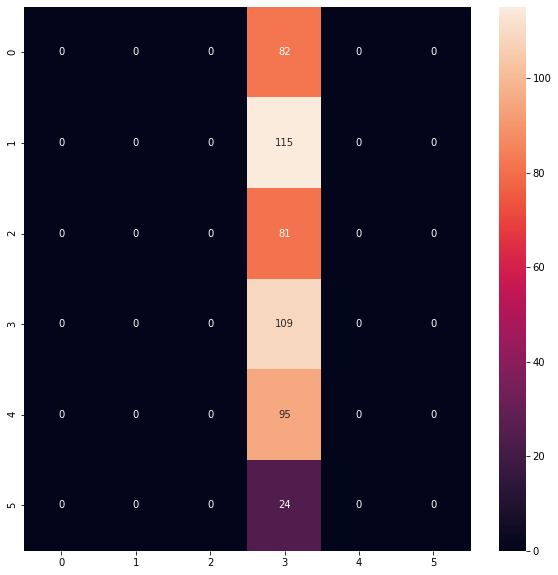

In [154]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(ytest,grid_predictions)
sns.heatmap(cm, annot=True, fmt="d")

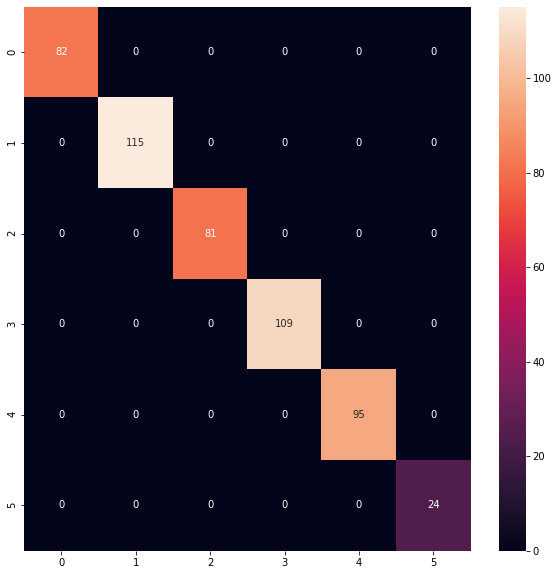

In [153]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(ytest,prediction)
sns.heatmap(cm, annot=True, fmt="d")

In [174]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['linear', 'rbf', 'poly'], 'C':[0.1, 0.5, 1, 5, 10]}

clf = GridSearchCV(SVC(), parameters)
clf.fit(xtrain, ytrain)
print('score',clf.score(xtest, ytest))
print(clf.best_params_)

score 0.5375494071146245
{'C': 10, 'kernel': 'rbf'}
Wall time: 19min 43s


In [177]:
"""   score 0.5375494071146245
{'C': 10, 'kernel': 'rbf'}
Wall time: 19min 43s   """

"   score 0.5375494071146245\n{'C': 10, 'kernel': 'rbf'}\nWall time: 19min 43s   "

In [195]:
xtrain, xtest, ytrain,ytest = train_test_split (features, labels, train_size=0.80, test_size=0.20)


In [186]:
model= SVC(C=10,kernel='rbf', gamma='auto')
model.fit(xtrain, ytrain)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [187]:
#passing the latest recommended attributes

In [188]:
pick= open('model5.sav','wb')
pickle.dump(model,pick)
pick.close()


In [196]:
pick= open('model5.sav','rb')
model=pickle.load(pick)
pick.close()

Accuracy :  0.849802371541502
Prediction is : paper


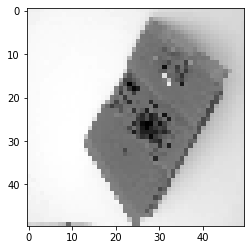

In [197]:
random.shuffle(data)
prediction= model.predict(xtest)
accuracy = model.score (xtest, ytest)

categories = ['cardboard','glass','metal','paper','plastic','trash']

print('Accuracy : ', accuracy)
print('Prediction is :',categories[prediction[0]])



trash=xtest[0].reshape(50,50)
plt.imshow(trash, cmap='gray')
plt.show()

  

In [198]:
#CONFUSION MATRIX
from sklearn.svm import SVC
predictions = model.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))

[[ 56   0   0  16   0   0]
 [  0  89   0  21   0   0]
 [  0   0  65  16   0   0]
 [  0   0   0 112   0   0]
 [  0   1   0  16  79   0]
 [  0   0   0   6   0  29]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        72
           1       0.99      0.81      0.89       110
           2       1.00      0.80      0.89        81
           3       0.60      1.00      0.75       112
           4       1.00      0.82      0.90        96
           5       1.00      0.83      0.91        35

    accuracy                           0.85       506
   macro avg       0.93      0.84      0.87       506
weighted avg       0.91      0.85      0.86       506



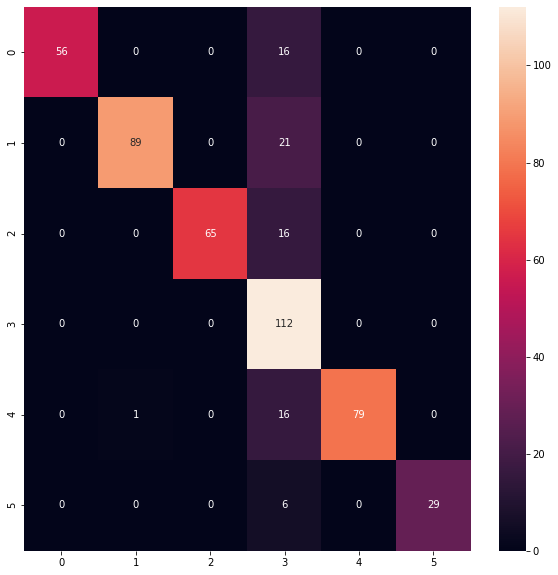

In [199]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(ytest,prediction)
sns.heatmap(cm, annot=True, fmt="d")

In [200]:
#here we can see by changing the attributes, we got a different result for accuracy as well as other parameters

In [176]:
#Tried different attributes this time

grid_predictions = grid.predict(xtest)
print(confusion_matrix(ytest,grid_predictions))
print(classification_report(ytest, predictions))


[[  0   0   0  82   0   0]
 [  0   0   0 115   0   0]
 [  0   0   0  81   0   0]
 [  0   0   0 109   0   0]
 [  0   0   0  95   0   0]
 [  0   0   0  24   0   0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00       115
           2       1.00      1.00      1.00        81
           3       1.00      1.00      1.00       109
           4       1.00      1.00      1.00        95
           5       1.00      1.00      1.00        24

    accuracy                           1.00       506
   macro avg       1.00      1.00      1.00       506
weighted avg       1.00      1.00      1.00       506



In [160]:

# determining outliers using Z scores where mean is  '0' and Standard deviation is '1'

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(ytest))
print(z)

[0.79039151 1.45918433 1.88477976 0.79039151 0.12159869 0.79039151
 0.54719412 0.79039151 1.45918433 0.54719412 0.12159869 0.54719412
 1.21598694 1.45918433 0.54719412 0.54719412 0.12159869 0.79039151
 0.54719412 1.21598694 1.21598694 1.21598694 0.79039151 0.79039151
 0.79039151 0.54719412 1.21598694 0.12159869 1.21598694 0.79039151
 0.12159869 0.12159869 1.88477976 0.79039151 0.79039151 0.54719412
 0.54719412 0.79039151 0.12159869 0.54719412 0.54719412 1.45918433
 0.79039151 0.12159869 0.54719412 1.21598694 0.54719412 1.88477976
 0.79039151 1.45918433 1.21598694 0.12159869 1.88477976 0.54719412
 1.21598694 0.54719412 0.79039151 0.12159869 0.79039151 0.79039151
 0.79039151 1.21598694 1.45918433 0.12159869 0.12159869 0.54719412
 0.79039151 1.45918433 1.21598694 0.79039151 0.12159869 0.54719412
 1.45918433 0.79039151 0.12159869 0.79039151 0.12159869 0.79039151
 1.45918433 0.54719412 1.45918433 1.45918433 1.21598694 1.21598694
 0.12159869 1.21598694 0.79039151 1.45918433 0.12159869 1.4591

In [161]:
# defining threshold as 3 to identify any outliers above 3
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)
